# Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np
import timeit

In [2]:
times_to_run = 1000

## Step 0
- You will get a csv file from us. Load it in your language/environment.
- Explore the data in it.

In [2]:
data_frame = pd.read_csv("data-OLS.csv")
data_frame

,x,y
0,0.00503,-0.05645
1,0.01005,0.06281
2,0.01508,0.00911
3,0.02010,0.03519
4,0.02513,0.08541
...,...,...
293,0.98586,0.11676
294,0.98995,0.35726
295,0.99293,0.14545
296,0.99497,0.47289


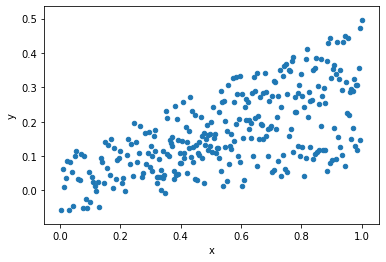

In [4]:
data_frame.plot.scatter(x='x', y='y')
plt.show()

## Step 1
- Implement a function* for OLS using optim/minimize.
- Find $\hat{\alpha} = (m,n)$, $y_i = mx_i+n$

In [3]:
def sum_square_errors(values):
    m, n = values
    x: pd.Series = data_frame['x']
    y: pd.Series = data_frame['y']
    return (y - (m * x + n)).pow(2).sum()

def step_1():
    return optimize.minimize(sum_square_errors, np.array((0, 1)))['x']

In [6]:
np.array((0, 1))

array([0, 1])

In [7]:
m, n = step_1()
(m, n)

(0.2733701741424711, 0.0170702485279762)

### Plot result

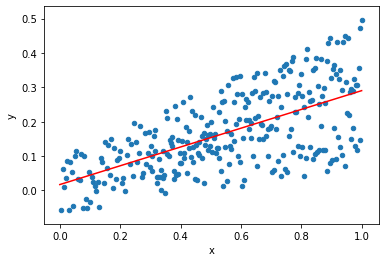

In [7]:
x_values = np.linspace(0, 1, 2)
data_frame.plot.scatter(x='x', y='y')
plt.plot(x_values, m * x_values + n, color='red')
plt.show()

# Step 2
- Implement a function* for OLS using the matrix solution.
- Find $\hat{\alpha}$ and compare its runtime to your other OLS function.

In [20]:
def step_2():
    count, _ = data_frame.shape
    x_T: np.ndarray = np.array(
        (data_frame['x'].to_numpy(), np.ones((count,))))
    y_T: np.ndarray = np.array(
        (data_frame['y'].to_numpy(), np.ones((count,))))
    a = np.linalg.inv(x_T @ x_T.T) @ x_T @ y_T.T
    return a[0]

In [21]:
m, n = step_2()
(m, n)

(0.27337029288410164, -2.220446049250313e-16)

### Plot result

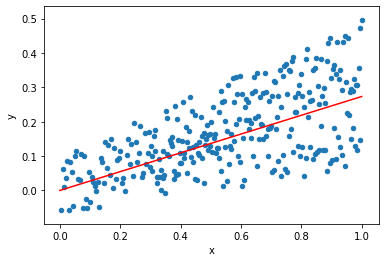

In [10]:
x_values = np.linspace(0, 1, 2)
data_frame.plot.scatter(x='x', y='y')
plt.plot(x_values, m * x_values + n, color='red')
plt.show()

### Measure time

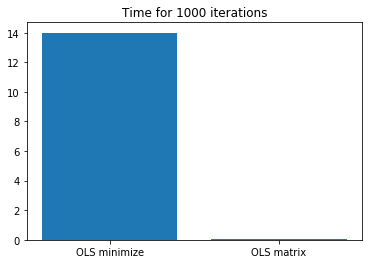

In [11]:
x_values = np.linspace(0, 1, 2)
steps = [(step_1, "OLS minimize"),
         (step_2, "OLS matrix")]

names, times = zip(
    *((name, timeit.timeit(step, number=times_to_run)) for
      step, name in steps))
y_pos = np.arange(len(steps))
plt.bar(y_pos, times)
plt.xticks(y_pos, names)
plt.title(f'Time for {times_to_run} iterations')
plt.show()

# Step 3
- Implement Ridge, Lasso and Elastic Net regression* using optim/minimize.
- Compare their resulting $\hat{\alpha}$ to each other and to OLS. Use different values for $\lambda$, $\lambda_1$ and $\lambda_2$.

In [12]:
def sum_ridge_errors(values):
    lmb = 1
    m, n = values
    return sum_square_errors(values) + lmb * (m ** 2 + n ** 2)


def sum_lasso_errors(values):
    lmb = 1
    m, n = values
    return sum_square_errors(values) + lmb * (abs(m) + abs(n))


def sum_elastic_net_errors(values):
    lmb_1, lmb_2 = 1, 1
    m, n = values
    return sum_square_errors(values) + lmb_1 * (abs(m) + abs(n)) + lmb_2 * (m ** 2 + n ** 2)

def step_3_1():
    return optimize.minimize(sum_ridge_errors, np.array((0, 1)))['x']


def step_3_2():
    return optimize.minimize(sum_lasso_errors, np.array((0, 1)))['x']


def step_3_3():
    return optimize.minimize(sum_elastic_net_errors, np.array((0, 1)))['x']

### Plot results

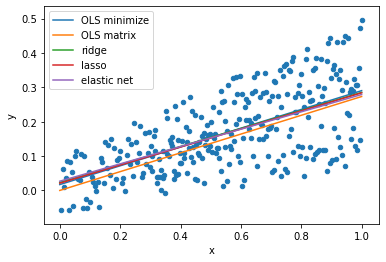

In [13]:
steps = [(step_1, "OLS minimize"),
         (step_2, "OLS matrix"),
         (step_3_1, "ridge"),
         (step_3_2, "lasso"),
         (step_3_3, "elastic net")]

data_frame.plot.scatter(x='x', y='y')
for step, name in steps:
    m, n = step()
    plt.plot(x_values, m * x_values + n, label=name)
plt.legend()
plt.show()

### Measure times

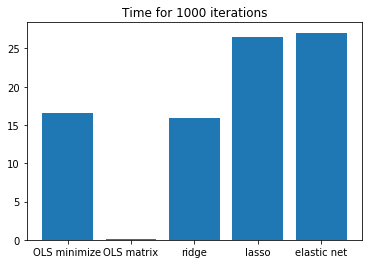

In [14]:
names, times = zip(
    *((name, timeit.timeit(step, number=times_to_run)) for
      step, name in steps))
y_pos = np.arange(len(steps))
plt.bar(y_pos, times)
plt.xticks(y_pos, names)
plt.title(f'Time for {times_to_run} iterations')
plt.show()